## Лабораторная работа 1. Знакомство с основными библиотеками и понятиями анализа данных

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, всесто этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (6 баллов) Знакомство с пакетом NumPy

![](http://static.wixstatic.com/media/7b913d_7d27b1ff5fe54cc79c80d2cc0e319d92~mv2.jpg)

Во всех заданиях данного раздела запрещено пользоваться циклами, а также использовать *builtin* функции *map*, *filter*, *zip*. Таким образом все функции в заданиях должны быть реализованы средствами самого пакета *numpy*. Для каждого задания привидите примеры использования реализованных функций. Предварительно полезно "по диагонали" ознакомиться с [документацией пакета](https://docs.scipy.org/doc/numpy-1.13.0/reference/), и детально с классом [numpy.ndarray](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html).

In [3]:
import numpy as np

**1. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и некоторое число *v* и возвращающую ближайший к заданному числу элемент матрицы. Например, для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    nearest_value = X.flatten()[abs(X - v).argmin()]
    return nearest_value

Пример использования функции nearest_value(X, v):

In [5]:
X = np.arange(-5,10).reshape((3, 5))
v = -.57
nearest_value(X, v)

-1

**2. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все её уникальные строки в виде матрицы.

In [6]:
def get_unique_rows(X):
    unique_rows = np.unique(X, axis=0)
    return unique_rows

Пример использования функции get_unique_rows(X):

In [7]:
X = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 3]])
get_unique_rows(X)

array([[1, 0, 0],
       [2, 3, 3]])

**3. (2 балла)** Реализуйте функцию, каторая во входной вещественной матрице *X* находит все значения *numpy.nan* и заменяет их на среднее арифметическое всех остальных элементов. В случае матрицы из одних *numpy.nan* произведите замену на нули.

In [8]:
def nans_to_mean(X):
    if len(X[np.invert(np.isnan(X))]) == 0:
        X[:] = 0
    else:
        X[np.isnan(X)] = np.nanmean(X)
    return X

Пример использования функции nans_to_mean(X):

In [9]:
nan = np.nan
X = np.array([[nan, 0, nan], [1, 0, nan], [2, 3, 3]])
nans_to_mean(X)

array([[ 1.5,  0. ,  1.5],
       [ 1. ,  0. ,  1.5],
       [ 2. ,  3. ,  3. ]])

### 2. (6 баллов) Знакомство с пакетами Pandas и Seaborn

![](https://datasciencelab.files.wordpress.com/2013/11/pandas-drinking-cr.png)

В этом задании вам придется работать с датасетом [Wine dataset](https://archive.ics.uci.edu/ml/datasets/wine), описывающим задачу классификации вин в приведенном ниже признаковом пространстве:

0. Wine class - метка класса (тип вина),
1. Alcohol - содержание спиртов (крепость вина),
2. Malic acid - содержание яблочной кислоты,
3. Ash - количество осадков,
4. Alcalinity of ash - щелчность осадков,
5. Magnesium - содержание магния,
6. Total phenols - общее содержание фенолов,
7. Flavanoids - содержание флаваноидов,
8. Nonflavanoid phenols - содержание нефлаваноидных фенолов,
9. Proanthocyanins - содержание фенольных проантоцианидинов,
10. Color intensity - интенсивность окраски вина,
11. Hue - оттенок вина,
12. OD280/OD315 of diluted wines - концентрация протеинов OD280/OD315,
13. Proline - содержание пролина

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

**1. (1 балл)** Скачайте данные по ссылкам [wine.data1.csv](https://yadi.sk/d/WomRBWgL3Rf4Dm), [wine.data2.csv](https://yadi.sk/d/Pz4kkQEn3Rf4Dk). Исходные данные разбиты на две части, загрузите каждую часть и объедините в один *pandas.DataFrame*. Отобразите первые 10 записей полученной таблицы.

In [11]:
wine_header = [
    'Wine class', 'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
    ]
wine_data1 = pd.read_csv('wine.data1.csv', names=wine_header)

In [12]:
wine_data2 = pd.read_csv('wine.data2.csv')
wine_data = pd.concat([wine_data1, wine_data2])
wine_data.head(n=10)

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
1,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
2,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
3,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
5,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
6,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
7,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
8,2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
9,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065


**2. (1 балл) ** Проверьте, все ли строки полученной таблицы уникальны. Если нет, то удалите дубликаты, оставив одну из пар. Есть ли в данных пропуски?

In [13]:
len(wine_data) == len(wine_data.drop_duplicates())

False

Количество элементов в начальном датасете не совпадает с количеством уникальных элементов в нём, значит, дубликаты есть, - удалим их.

In [14]:
wine_data = wine_data.drop_duplicates()

Проверим датасет на наличие пропусков - их нет:

In [15]:
nan_values = sum(wine_data.isnull().sum())
nan_values

0

Теперь у нас есть датасет wine_data без повторяющихся объектов и пропусков.

** 3. (2 балла)** Соберите основную статистику для таблицы, ответив на следующие вопросы. Сколько объектов в таблице? Какова размерность признакового пространства? Каково распределение объектов каждого из классов? Каковы средние и медианные значения в каждом классе каждого из признаков?

Соберем вместе основные характеристики датафрейма в словаре:

In [129]:
df_info = dict()
df_info['n_objects'] = len(wine_data)
df_info['n_columns'] = len(wine_data.columns)
df_info['shape'] = wine_data.iloc[:,1:].shape
df_info['classes'] = sorted(wine_data['Wine class'].unique())
df_info['classes_dist'] = dict(wine_data['Wine class'].value_counts())
df_info['classes_dist_norm'] = {i : j for i, j in 
                                zip(df_info['classes'], np.array(wine_data['Wine class'].value_counts(normalize=True)).round(3))}

In [147]:
df_info

{'classes': [1, 2, 3],
 'classes_dist': {1: 59, 2: 71, 3: 48},
 'classes_dist_norm': {1: 0.39900000000000002,
  2: 0.33100000000000002,
  3: 0.27000000000000002},
 'n_columns': 14,
 'n_objects': 178,
 'shape': (178, 13)}

Узнаем так же средние и медианные значения в каждом классе каждого из признаков:

In [158]:
df_mean_std = pd.DataFrame()
df_mean_std['feature'] = wine_data.columns[1:]
df_mean_std['mean_class_1'] = pd.Series([np.mean(wine_data[wine_data['Wine class']==1][i]) 
                                         for i in df_mean_std['feature']])
df_mean_std['mean_class_2'] = pd.Series([np.mean(wine_data[wine_data['Wine class']==2][i]) 
                                         for i in df_mean_std['feature']])
df_mean_std['mean_class_3'] = pd.Series([np.mean(wine_data[wine_data['Wine class']==3][i]) 
                                         for i in df_mean_std['feature']])
df_mean_std['std_class_1'] = pd.Series([np.std(wine_data[wine_data['Wine class']==1][i]) 
                                        for i in df_mean_std['feature']])
df_mean_std['std_class_2'] = pd.Series([np.std(wine_data[wine_data['Wine class']==2][i]) 
                                        for i in df_mean_std['feature']])
df_mean_std['std_class_3'] = pd.Series([np.std(wine_data[wine_data['Wine class']==3][i]) 
                                        for i in df_mean_std['feature']])

In [159]:
df_mean_std

,feature,mean_class_1,mean_class_2,mean_class_3,std_class_1,std_class_2,std_class_3
0,Alcohol,13.744746,12.278732,13.153750,0.458192,0.534162,0.524689
1,Malic acid,2.010678,1.932676,3.333750,0.682689,1.008391,1.076514
2,Ash,2.455593,2.244789,2.437083,0.225233,0.313238,0.182756
3,Alcalinity of ash,17.037288,20.238028,21.416667,2.524651,3.326097,2.234515
4,Magnesium,106.338983,94.549296,99.312500,10.409595,16.635097,10.776433
5,Total phenols,2.840169,2.258873,1.678750,0.336077,0.541507,0.353233
6,Flavanoids,2.982373,2.080845,0.781458,0.394111,0.700713,0.290431
7,Nonflavanoid phenols,0.290000,0.363662,0.447500,0.069453,0.123085,0.122840
8,Proanthocyanins,1.899322,1.630282,1.153542,0.408602,0.597813,0.404555
9,Color intensity,5.528305,3.086620,7.396250,1.228032,0.918393,2.286743


**4. (2 балла) ** Постройте попарную зависимость каждого из признаков, используйте *seaborn.pairplot*. Изучите внимательно полученные зависимости. Как вы думаете в каких комбинациях признаков классы хорошо отделяются друг от друга? Какие из признаков являются наиболее значимыми, а какие нет? Какие из признаков коррелированы друг с другом? Все свои ответы поясните. 

Чтобы найти скоррелированные признаки, посмотрим на матрицу корреляции (на графике pairplot то же самое отражается в схожести графика и прямой). 

Высокая прямая корреляция наблюдается у признаков:
    - содержание флаваноидов и общее содержание фенолов;
    - содержание флаваноидов и содержание фенольных проантоцианидинов;
    - содержание флаваноидов и концентрация протеинов OD280/OD315;
    - содержание спиртов (крепость вина) и содержание пролина.
    
Высокая обратная корреляция наблюдается у признаков:
    - класс вина и общее содержание фенолов;
    - класс вина и содержание флаваноидов;
    - класс вина и оттенок вина;
    - класс вина и концентрация протеинов OD280/OD315;
    - класс вина и содержание пролина.
    
Мне кажется, они и будут в первую очередь важными признаками. К тому же, наверное, важно, чтобы они не сильно коррелировали с другими признаками, иначе они не вносят информации. То есть выбираем либо содержание флаваноидов, либо содержание фенолов, либо концентрацию протеинов; оттенок вина и содержание пролина.

In [18]:
wine_data.corr()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Wine class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


И на визуализированную матрицу корреляции заодно:

Text(0.5,1,'Matrix of correlation')

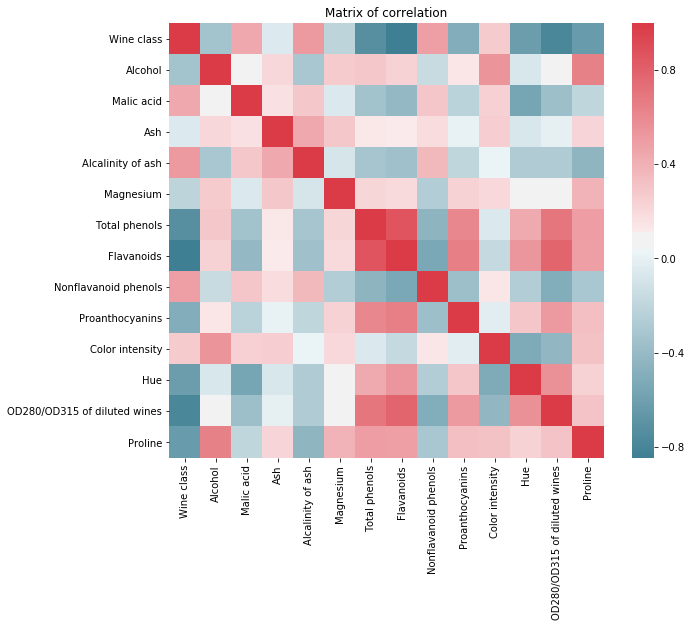

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine_data.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
                       cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
ax.set_title('Matrix of correlation')

Чтобы понять, в каких комбинациях признаков классы хорошо отделяются друг от друга, посмотрим на график попарной 
связанности признаков. Это комбинации признаков, которые сами хорошо коррелируют с классом вина.

Text(0.5,0.98,'Pairplot of wine_data dataset')

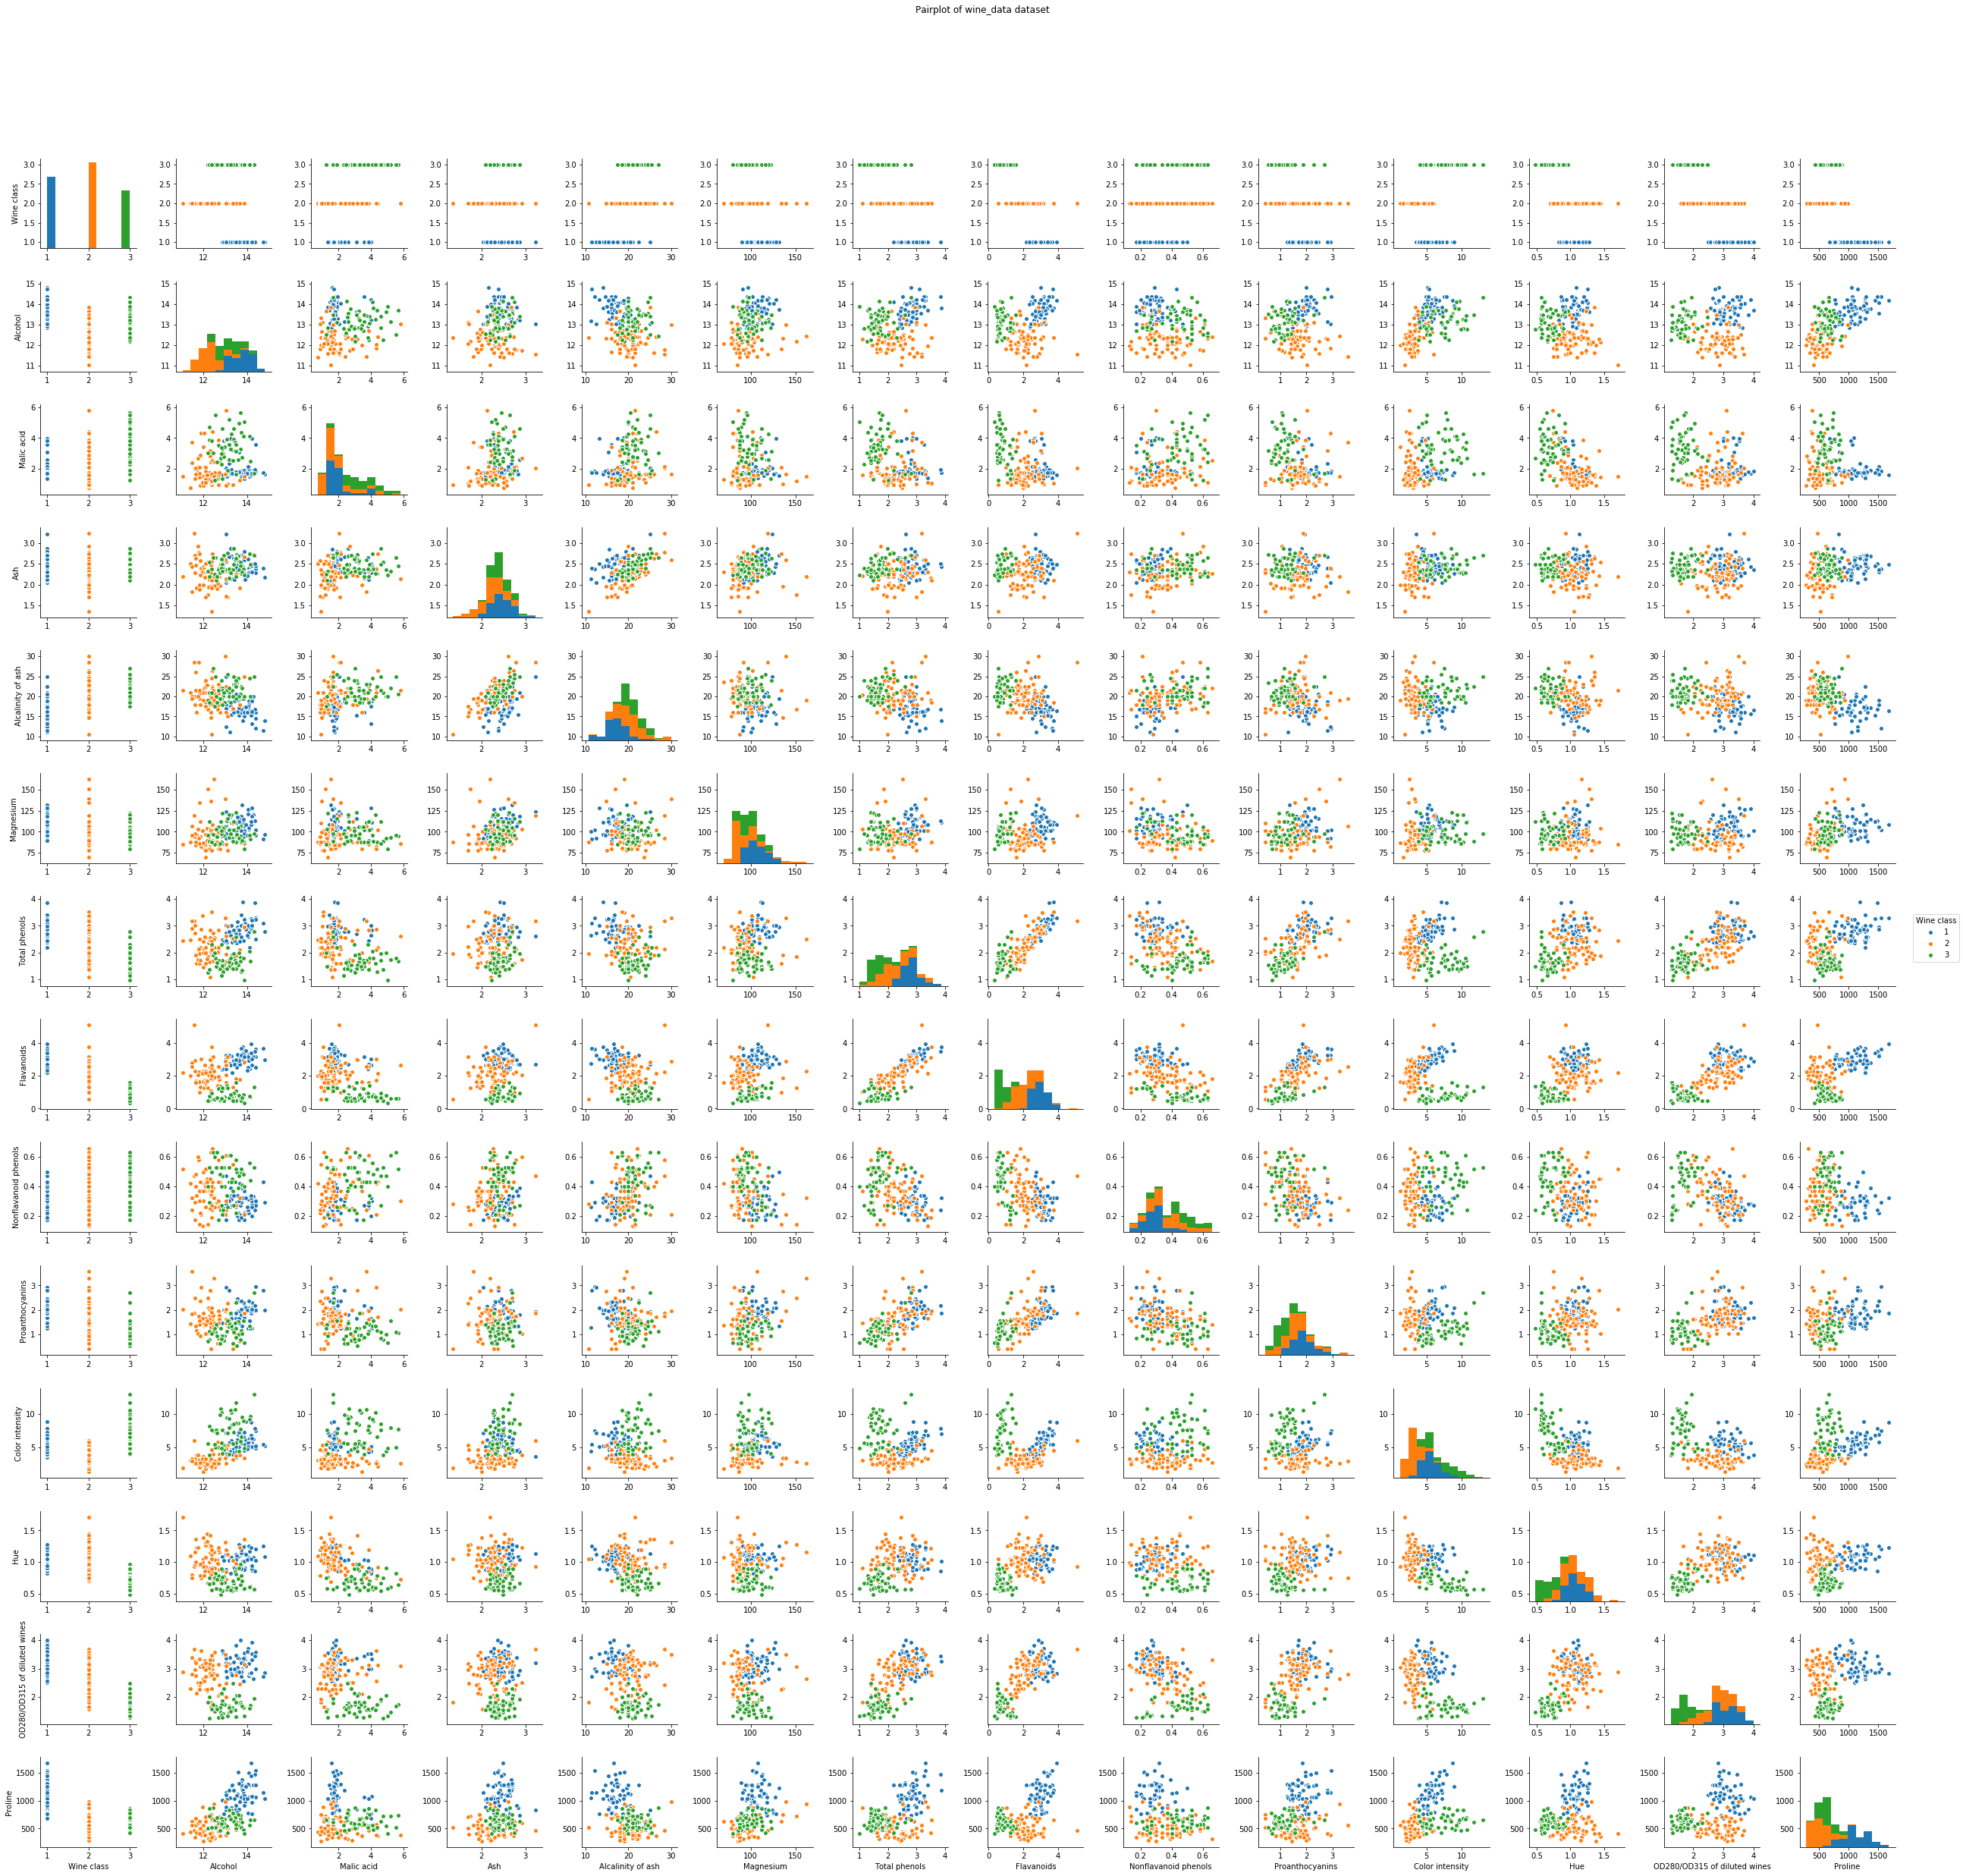

In [20]:
sns_plot = sns.pairplot(wine_data, hue='Wine class')
plt.subplots_adjust(top=0.9)
sns_plot.fig.suptitle('Pairplot of wine_data dataset')

In [21]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = wine_data.loc[:, wine_data.columns != 'Wine class']
y = wine_data['Wine class']
X = np.array(X)
y = np.array(y)
X_new = SelectKBest(score_func=chi2, k=5).fit_transform(X, y)
X_new'''

### 3. (8 баллов) Знакомство с пакетом Sklearn и алгоритмом kNN

![](http://www.scipy-lectures.org/_images/scikit-learn-logo.png)

В этом задании вам будет предложено продолжить работать с данными Wine dataset. Постарайтесь обойтись без дублирования кода, подготовьте шаблонные функции для построения графиков в заданиях.

** 1. (1 балл)** Преобразуйте данные  к матричному виду *numpy.array*: создайте из *pandas.DataFrame* отдельно матрицу объект-признак и вектор ответов.

In [23]:
X = wine_data.loc[:, wine_data.columns != 'Wine class']
y = wine_data['Wine class']
X = np.array(X)
y = np.array(y)

** 2. (2 балла) ** Обучите классификатор *sklearn.neighbors.KNeighborsClassifier* на данных Wine dataset для различных параметров n_neighbors, используя методику *sklearn.model_selection.GridSearchCV*. Постройте график зависимости метрики accuracy от параметра n_neighbors, а также ее $1\sigma-$доверительный интервал. При каком параметре n_neigbors достигается максимальное значение accuracy? Повторите эксперимент для различных параметров cv: 5, 10, 15. Какие выводы можно сделать?

In [26]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

Проведем кросс-валидацию и выберем оптимальное количество соседей:

cv=5

In [54]:
clf = KNeighborsClassifier()
n = 100
params = {'n_neighbors': list(range(1, n))}
grid_searcher = GridSearchCV(clf, params, cv=5)
grid_searcher.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
grid_searcher.best_params_['n_neighbors']

1

Визуализируем полученные оценки качества и их $1\sigma$-доверительный интервал:

In [47]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

means = np.array(means)
stds = np.array(stds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


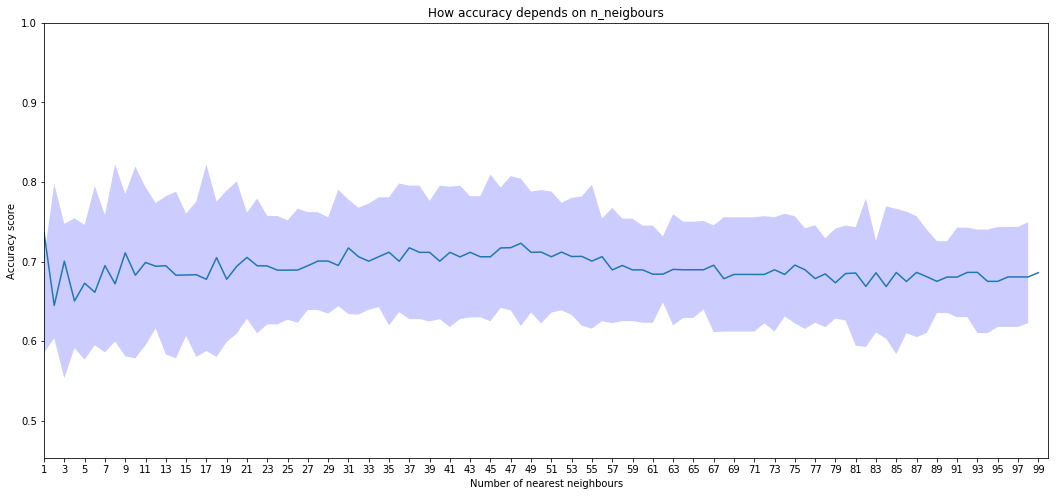

In [56]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.title('How accuracy depends on n_neigbours')
plt.show()

cv=10

In [82]:
clf = KNeighborsClassifier()
n = 100
params = {'n_neighbors': list(range(1, n))}
grid_searcher = GridSearchCV(clf, params, cv=10)
grid_searcher.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
grid_searcher.best_params_['n_neighbors']

1

In [73]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

means = np.array(means)
stds = np.array(stds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


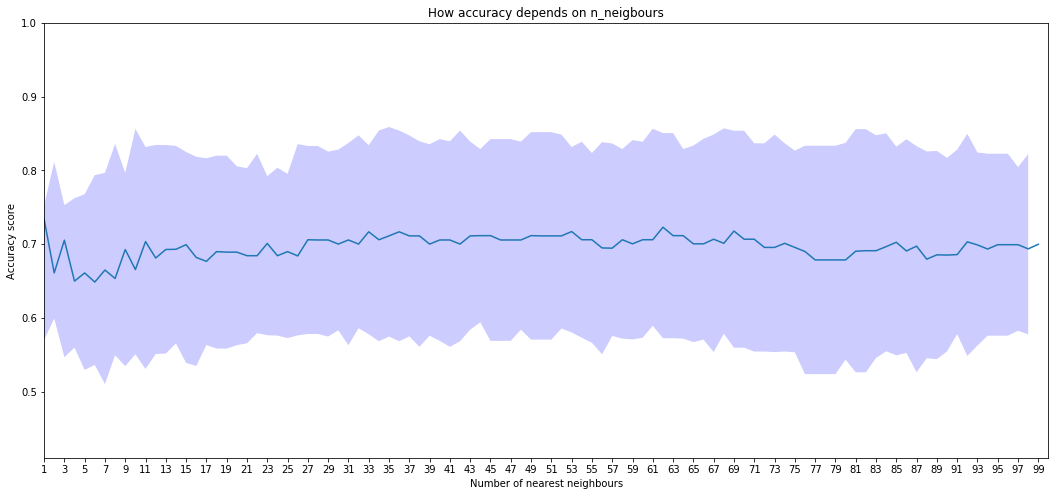

In [74]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.title('How accuracy depends on n_neigbours')
plt.show()

cv=15

In [75]:
clf = KNeighborsClassifier()
n = 100
params = {'n_neighbors': list(range(1, n))}
grid_searcher = GridSearchCV(clf, params, cv=15)
grid_searcher.fit(X, y)

GridSearchCV(cv=15, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

means = np.array(means)
stds = np.array(stds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


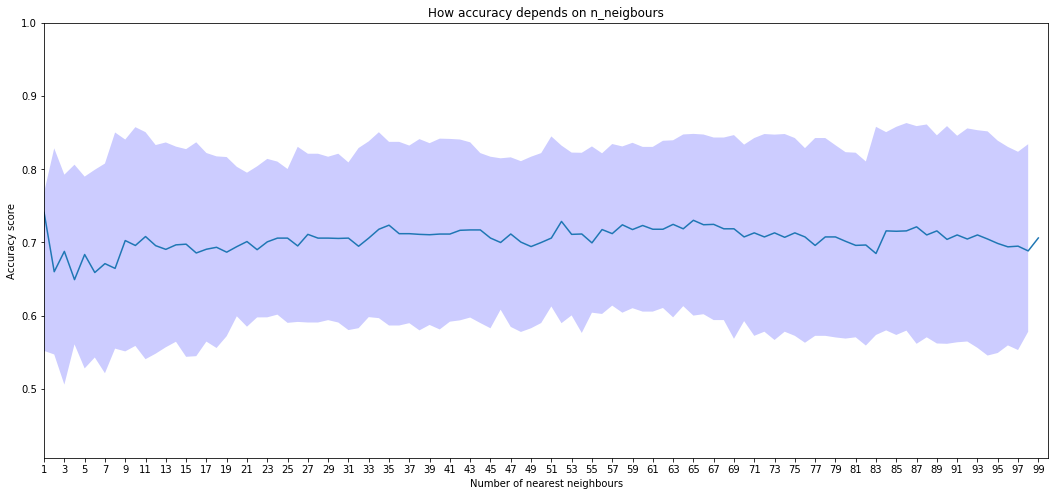

In [78]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.title('How accuracy depends on n_neigbours')
plt.show()

Результат: оптимальное количество соседей при cv=5, cv=10 и cv=15 одинаково и равно 1.

**3. (2 балла) ** Можно ли улучшить accuracy, предварительно преобразовав данные? Трасформируйте данные, используя *sklearn.preprocessing.scale*. Повторите эксперимент из предыдущей задачи для преобразованных данных (можно для единственного параметра cv). Улучшился ли результат? Какие выводы можно сделать? 

Отмасштабируем данные:

In [62]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

Проведем еще раз эксперимент:

In [84]:
clf = KNeighborsClassifier()
n = 100
params = {'n_neighbors': list(range(1, n))}
grid_searcher = GridSearchCV(clf, params, cv=15)
grid_searcher.fit(X_scaled, y)

GridSearchCV(cv=15, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
grid_searcher.best_params_

{'n_neighbors': 34}

In [85]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

means = np.array(means)
stds = np.array(stds)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


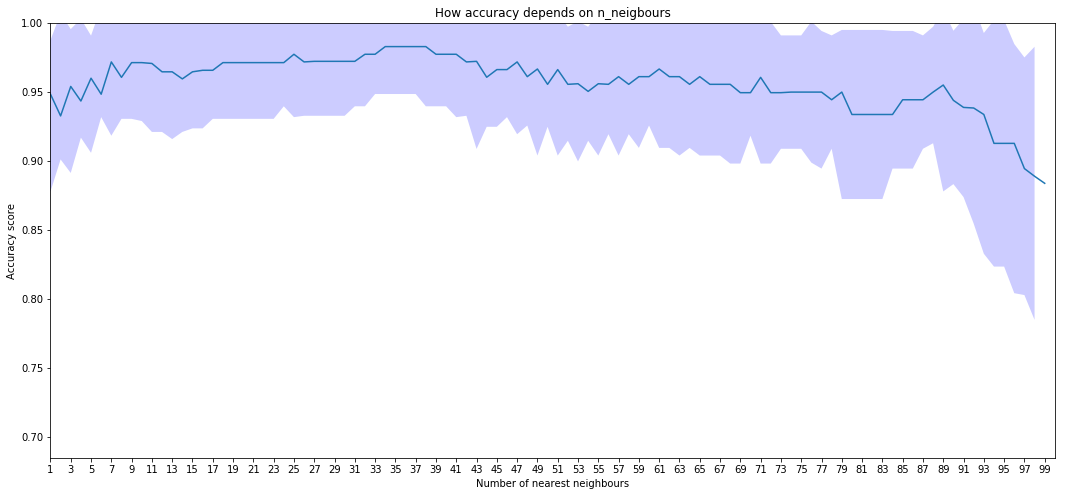

In [86]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.title('How accuracy depends on n_neigbours')
plt.show()

**Результат**: согласно значению метрики accuracy качество предсказания значительно улучшилось после того, как мы отмасштабировали данные (в среднем стал ~ 0.95, а был ~ 0.7). Оптимальное количество соседей также изменилось - стало 34.  
**Вывод**: KNN чувствителен к нормализации данных.  
**Объяснение**: Это можно легко объяснить. Если значения одной величины варьируются сильно больше, чем другой, то при подсчете расстояния между точками, знаения первой будут учитываться сильнее, даже если вторая больше влияет на ответ.

**4. (1 балл) ** Постройте confusion matrix, а также найдите значения метрик: recall, precision, f1-score для лучшего классификатора из предыдущей задачи. Посмотрите в сторону модуля *sklearn.metrics*. Какие выводы можно сделать по полученным значениям метрик?

Разобьём данные на 2 части - обучающую и тетовую:

In [89]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

Обучим лучший классификатор (n_neighbors=34) на отмасштабированных данных:

In [90]:
clf = KNeighborsClassifier(n_neighbors=34)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Построим confusion matrix (при n_neighbors=34 и масштабирование данных):

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #3*3, потому что 3 класса

array([[16,  0,  0],
       [ 2, 18,  1],
       [ 0,  0, 17]])

Посчитаем другие метрики:

In [98]:
print(classification_report(y_test, y_pred, target_names=['1', '2', '3']))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94        16
          2       1.00      0.86      0.92        21
          3       0.94      1.00      0.97        17

avg / total       0.95      0.94      0.94        54



**Результат**: Как видно из матрицы ошибок, класс 2 всегда определяется правильно, но элементам класса 1 и класса 3 все еще иногда приписвыается класс 2. Это, видимо, связано с тем, что элементов класса 2 в выборке больше, чем класса 1 или 3.

**5. (2 балла) ** В задаче 2.4 вы должны были высказать гипотезу о выжности признаков. Удалите на ваш взгляд неважные признаки, проведите эксперимент предыдущей задачи. Удалите на ваш взгляд самые важные признаки, проведите эксперимент предыдущей задачи. Подтвердились ли вашы гипотезы, сделанные в задаче 2.4?

Удалим неважные признаки и проведем еще раз эксперимент:

In [199]:
X = wine_data.loc[:, ['Flavanoids', 'Hue', 'Proline']]
y = wine_data['Wine class']
X = np.array(X)
y = np.array(y)
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [200]:
clf = KNeighborsClassifier(n_neighbors=34)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

0.98148148148148151

КРУТО!

Удалим важные признаки и проведем еще раз эксперимент:

In [236]:
X = wine_data.loc[:, ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                      'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity']]
y = wine_data['Wine class']
X = np.array(X)
y = np.array(y)
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [237]:
clf = KNeighborsClassifier(n_neighbors=34)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

0.79629629629629628

ХУЖЕ! Более или менее подтвердились, хотя не то что бы рандомная классификация стала.

### 4. (10 баллов) Бонусное задание

![](https://i.ytimg.com/vi/FZW-lIorb-8/hqdefault.jpg)

P.S. Leon мне ничего не платит:(

**1. (3 + 2 баллов)** Известно, что метод ближайших соседей неустойчив к шуму. Рассмотрим модельную задачу бинарной классификации с одним признаком и двумя объектами обучающей выборки: $x_1 = 0.1$, $x_2 = 0.5$. Первый объект относится к первому классу, второй - ко второму. Добавим к объектам новый шумовой признак, распределенный равномерно на отрезке $[0, 1]$. Теперь каждый объект описывается уже двумя признаками. Пусть требуется классифицировать новый объект $u=(0,0)$ в этом пространстве методом одного ближайшего соседа (метрика Евклида). Какова вероятность того, что после добавления шума второй объект окажется к нему ближе, чем первый? *Примечание:* задание можно решить теоретически (3 балла), а можно при помощи моделирования [методом Монте-Карло](https://pythonprogramming.net/monte-carlo-simulator-python/) и средствами [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) (2 балла).

Создадим датафрейм из задачи:

In [294]:
df_experiment = pd.DataFrame()
df_experiment['x'] = pd.Series([0.1, 0.5, 0])
df_experiment['class'] = pd.Series([1,2, np.nan])
df_experiment['noise'] = pd.Series(['a1', 'a2', 0])
df_experiment

,x,class,noise
0,0.1,1.0,a1
1,0.5,2.0,a2
2,0.0,NaN,0


    1. Воспользуемся метрикой Евклида для нахождения расстояния между u и объектами x1 и x2:

$$d(p, q) = \sqrt{\sum_{k=1}^N{(p_k - q_k)^2}}$$

Тогда вероятность того, что второй объект окажется ближе к объекту *u = (0,0)*, равна:

$$P \left(d(x1, q) > d(x2, q)\right)$$

$$P \left(0.1^2 + a_1^2 > 0.5^2 + a_2^2\right)$$

$$P \left(a_2 < \sqrt{a_1^2 - 0.24}\right)$$

Воспользуемся формулой вероятности попадания случайной величины на участок от a до b:

$$P(\alpha<X<\beta) = \int_\alpha^\beta f(x)\, dx$$

$a_2$ изменяется от *0* до $\sqrt{a_1^2 - 0.24}$  

$a_1$ изменяется от $\sqrt{0.24}$ до *1*

$f(x) = 1$, поскольку значения шумовой признака распределены равномерно на отрезке $[0, 1]$

Получаем выражение для вероятности:

$$P\left(0 < a_2 < \sqrt{a_1^2 - 0.24}\right) = \int_\sqrt{0.24}^1\int_0^\sqrt{a_1^2 - 0.24}\, da_2 da_1 = $$
$$ = \int_\sqrt{0.24}^1\sqrt{a_1^2 - 0.24}\, da_1 = $$  
$$ = \left| \begin{array}{c} a_1={\sqrt{0.24}}\cdot{\sec\phi} \\  da_1 ={\sqrt{0.24}}\cdot{\sec\phi}\cdot{\tan\phi}\, d\phi \end{array}  \right| = $$

$$ = \int_\sqrt{0.24}^1\sqrt{0.24}\sec\phi\tan\phi\sqrt{{(\sec^2\phi - 1)}\cdot{0.24}}\, d\phi = $$
$$ = {0.24}\cdot{\int_\sqrt{0.24}^1\tan^2\phi\sec\phi\, d\phi} = $$
$$ = {0.24}\cdot{\int_\sqrt{0.24}^1\sec^3\phi-\sec\phi\, d\phi} = $$  
$$ = {0.24}\cdot{\left(\int_\sqrt{0.24}^1\sec^3\phi\, d\phi - \int_\sqrt{0.24}^1\sec\phi\, d\phi\right)} = $$  
$$ = {0.24}\cdot{\left(\*\int_\sqrt{0.24}^1\sec^3\phi\, d\phi - \ln\left|1/\sqrt{0.24} + \sqrt{1/0.24 - 1}\right|\right)} = $$  
$$ = {-0.12}\cdot{\ln\left|1/\sqrt{0.24} + \sqrt{1/0.24 - 1}\right|} + {0.12}\cdot{{1/\sqrt{0.24}}\cdot{(1/0.24 - 1)} - {0.12}\cdot{\ln\left|1/\sqrt{0.24} + \sqrt{1/0.24 - 1}\right|}}$$

In [324]:
#integrate with scipy.integrate
#from scipy.integrate import quad
#def integrand(x):
#    return np.sqrt(x**2 - 0.24)
#quad(integrand, np.sqrt(0.24), 1.0)[0]

(0.27503614458779757, 2.341588034582287e-11)

\\* Посчитаем отдельно $\int\sec^3\phi\, d\phi$:

$\int\sec^3\phi\, d\phi = \left| \begin{array}{c} u=\sec\phi \\  dv = \sec^2\phi\, dphi \\ du = \sec\phi \tan\phi\, d\phi \\ v = \tan\phi \end{array}  \right| = \sec\phi\tan\phi - \int\tan\phi\, d\sec\phi = \sec\phi\tan\phi - \int\tan^2\phi\sec\phi\, d\phi = \sec\phi\tan\phi - \int\sec^3\phi\, d\phi + \int\sec\phi\, d\phi$ 

$2\int\sec^3\phi\, d\phi = \sec\phi\tan\phi + \int\sec\phi\, d\phi$

$\int\sec^3\phi\, d\phi = \frac{\ln\left|\sec\phi + \tan\phi\right| + \sec\phi\tan\phi}{2}$

In [326]:
import math
-0.12 * math.log(1/np.sqrt(0.24) + np.sqrt(76/24)) + 0.12 / np.sqrt(0.24) * np.sqrt(0.76/0.24)

0.2750361445877974

$$P\left(0 < a_2 < \sqrt{a_1^2 - 0.24}\right) ≈ 0.275$$

Таким образом, вероятность того, что шумовой признак повлияет на расстояния между объектами, получилась примерно 1 к 4, что может в свою очередь довольно сильно повлиять на результат.

    2. Проверим то же самое с помощью метода Монте-Карло:

Под методом Монте-Карло понимается численный метод решения математических задач при помощи моделирования случайных величин. Под случайной величиной будем понимать вероятность того, что расстояние от x1 до u больше, чем от x2 до u. Под экспериментом будем понимать генерацию значений шумового признака, распределенного равномерно на отрезке $[0,1]$ для x1 и x2. Проведем эксперимент большое количество раз (N) и оценим значение случайной величины:

In [260]:
def rollDice():
    roll = np.random.uniform(0.0,1.0)
    return roll

In [369]:
i = 0
counter = 0
N = 1000000
while i != N:
    dist1 = math.hypot(0.1, rollDice())
    dist2 = math.hypot(0.5, rollDice())
    if dist1 > dist2:
        counter += 1
    i += 1
print(counter / N)

0.275363


При N=100000 значение случайной величины приблизительно равно 0.275. Метод подтверждает результаты, полученные теоретическим путём.

**2. (5 баллов)** В алгоритме классификации kNN могут использоваться разные алгоритмы поиска ближайших соседей, различимых с точки зрения вычислительной эффективности. Приведите наиболее известные алгоритмы поиска k ближайших точек в пространстве, выпишите асимптотическую сложность в bigO-нотации для обучения классификатора и для предсказания одного объекта (как для затрат по памяти, так и для машинного времени). Параметры обозначьте как k - количество соседей, n - размерность пространства, M - количество объектов в обучающей выборке. Какие из алгоритмов реализованы в *sklearn.neighbors.KNeighborsClassifier*, какие параметры конструктора за это отвечают?

В sklearn.neighbors.KNeighborsClassifier реализованы 3 алгоритма поиска ближайших соседей:
* brute-force
* BallTree
* KDTree

Алгоритмы настраиваются параметрами:
    - algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
    - leaf_size : int, optional (default = 30)

**Brute-force algorithm**  
Тупой перебор всех попарных расстояний. В пространстве размерности n на M объектах будет работать $O\left(n\frac{{M}\cdot{(M-1)}}{2}\right) = O(nM^2)$.